<a href="https://colab.research.google.com/github/may-cbcp/ghg_act-a/blob/main/notebook/ghg_acta_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install basemap
!pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 10.9 MB/s eta 0:00:00


In [3]:

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator, FuncFormatter

from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim


from google.colab import drive
drive.mount('/content/drive', force_remount=True)


arquivo = "/content/drive/MyDrive/ghg_act-a/tabelas/2023Jun01-ACT-A_Commitment_Tracker.xlsx"
nome_aba = "Overall"
act_a = pd.read_excel(arquivo, skiprows=2, sheet_name=nome_aba)

Mounted at /content/drive


# Funções utilizadas

In [4]:
def gerar_grafico_tipo_doador(df='NA', tipo_doador='NA',grafico_titulo='NA',nome_eixo_x='NA',nome_eixo_y='NA'):


    # Função para formatar valores e identificar M ou B
    def formatar_milhoes_bilhoes(valor, _):
        if valor >= 1000.000:
            return f'{valor:.2f}B'
        elif 0 <= valor <= 999.99:
            return f'{valor:.2f}M'


    # Ajustar o tamanho da figura para manter a separação entre as barras
    plt.figure(figsize=(10, len(df) * 0.4))

    # Criar o gráfico de barras com Matplotlib para os doadores restantes
    bars = plt.barh(df['Donor'], df['TOTAL ACT-A funding'], color='gray', edgecolor='none', height=0.9)

    # Adicionar rótulos e título
    plt.xlabel(nome_eixo_x)
    plt.ylabel(nome_eixo_y)
    plt.title(grafico_titulo)

    # Adicionar valores nos extremos das barras com notação em milhões/bilhões
    for bar in bars:
        valor = bar.get_width()
        plt.text(valor, bar.get_y() + bar.get_height()/2, formatar_milhoes_bilhoes(valor, None), va='center', ha='left')

    # Remover escalas no eixo x
    plt.xticks([])

    # Remover bordas da caixa ao redor do gráfico
    plt.box(False)

    # Inverter a ordem dos doadores para corresponder ao gráfico do Plotly
    plt.gca().invert_yaxis()

    # Adicionar formatação personalizada para os rótulos do eixo x
    plt.gca().xaxis.set_major_formatter(FuncFormatter(formatar_milhoes_bilhoes))

    # Exibir o gráfico
    return plt.show()

In [5]:
def obter_coordenadas_por_pais(nome_do_pais):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(nome_do_pais)

    if location:
        latitude = location.latitude
        longitude = location.longitude
        return latitude, longitude
    else:
        return None,None

In [6]:
def gerar_grafico_tipo_doador_ano(df='NA'):
    soma_2020_21 = df['2020-21 financial contributions'].sum()
    soma_2021_22 = df['2021-22 financial contributions'].sum()
    soma_2022_23 = df['2022-23 financial contributions'].sum()
    data_somas = {
        '2020-21': [soma_2020_21],
        '2021-22': [soma_2021_22],
        '2022-23': [soma_2022_23]
    }

    df_somas = pd.DataFrame(data_somas)

    # Criando um gráfico de barras em escala de cinza
    plt.figure(figsize=(10, 6))
    colors = plt.cm.gray(np.linspace(0.3, 0.8, len(df_somas.columns)))  # Tons de cinza
    bars = plt.bar(df_somas.columns, df_somas.iloc[0], color=colors)

    # Adicionando valores no topo das colunas com indicador B ou M
    for bar, valor in zip(bars, df_somas.iloc[0]):
        texto_valor = f'{valor:.2f}'
        if valor >= 1e9:
            texto_valor = f'{valor/1e9:.2f}B'
        elif valor >= 1e6:
            texto_valor = f'{valor/1e6:.2f}M'

        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, texto_valor,
                ha='center', va='bottom')

    plt.xlabel('Ano Financeiro')
    plt.ylabel('Soma das Contribuições Financeiras')
    plt.title('Somas das Contribuições Financeiras por Ano')

    # Configuração do eixo y para mostrar incrementos de 200 milhões
    formatter = FuncFormatter(lambda x, _: f'{x:.0f}M' if x < 1000 else f'{x/1000:.1f}B')
    plt.gca().yaxis.set_major_formatter(formatter)

    # Remover bordas da caixa ao redor do gráfico
    plt.box(False)
    return plt.show(), df_somas


# Doadores privados

## Todos

In [7]:
tipo_doador = 'Private'
grafico_titulo = 'Maiores doadores privados do ACT-A até junho de 2023'
nome_eixo_x = 'Doações totais ACT-A'
nome_eixo_y = 'Doadores'


df = act_a
df = df.dropna(subset=['Type'])
# Redefinir o índice
df = df.reset_index(drop=True)
condicao_exclusao = (
    (df['Donor'] == 'Private donors Sub-total') |
    (df['Donor'] == 'Fidelity Charitable gift funds' )
     )
df = df[(df['Type'].str.contains(tipo_doador, case=False, na=False)) & (~condicao_exclusao)]
df = df.sort_values(by="TOTAL ACT-A funding", ascending=False)
df_top = df.head(5)
df_privado = df
# Redefinir o índice começando por 1
df_privado.index = range(1, len(df) + 1)
df_privado


,Donor,Type,TOTAL ACT-A funding,2020-21 financial contributions,2021-22 financial contributions,2022-23 financial contributions,CEPI,Gavi,Therapeutics Accelerator,Unitaid,...,Unicef,GFF,MPP,Pending Allocation to/by Agency,Vaccines,Therapeutics,Diagnostics,Health Systems,Pending Allocation to/by Pillars,Comments
1,Bill & Melinda Gates Foundation,Private,448.886229,448.636229,0.250000,0.000000,19.999978,236.250000,190.0000,0.0,...,0.000000,0.0,0.0,0.0,257.030083,190.285111,0.307027,1.014009,0.250000,Gavi figures include the pro-rata share of una...
2,UNICEF National Committees,Private,252.897773,204.597773,48.300000,0.000000,0.000000,0.000000,0.0000,0.0,...,252.897773,0.0,0.0,0.0,166.325000,9.935997,18.823303,57.813473,0.000000,NaN
3,Other philanthropic and private sector contrib...,Private,126.801103,46.823662,79.977441,0.000000,0.000000,126.801103,0.0000,0.0,...,0.000000,0.0,0.0,0.0,126.801103,0.000000,0.000000,0.000000,0.000000,NaN
4,Gates Philanthropy Partners,Private,118.869500,118.869500,0.000000,0.000000,0.000000,18.000000,100.8695,0.0,...,0.000000,0.0,0.0,0.0,18.000000,100.869500,0.000000,0.000000,0.000000,NaN
5,Wellcome Trust,Private,79.643427,75.000000,3.811007,0.832420,25.000000,0.000000,50.0000,0.0,...,0.000000,0.0,0.0,0.0,25.000000,50.000000,3.811007,0.832420,0.000000,NaN
6,Mastercard,Private,53.305266,53.305266,0.000000,0.000000,0.000000,28.305266,25.0000,0.0,...,0.000000,0.0,0.0,0.0,28.305266,25.000000,0.000000,0.000000,0.000000,NaN
7,Reed Hastings and Patty Quillin,Private,30.000000,30.000000,0.000000,0.000000,0.000000,30.000000,0.0000,0.0,...,0.000000,0.0,0.0,0.0,30.000000,0.000000,0.000000,0.000000,0.000000,NaN
8,Contributions < $1m (combined),Private,17.644130,15.912013,1.732117,0.000000,3.235743,13.304267,0.0000,0.0,...,0.000000,0.0,0.0,0.0,16.540010,0.000000,0.000000,0.000000,1.104120,NaN
9,COVID-19 Solidarity Response Fund,Private,10.000000,10.000000,0.000000,0.000000,10.000000,0.000000,0.0000,0.0,...,0.000000,0.0,0.0,0.0,10.000000,0.000000,0.000000,0.000000,0.000000,NaN
10,Twilio,Private,10.000000,10.000000,0.000000,0.000000,0.000000,10.000000,0.0000,0.0,...,0.000000,0.0,0.0,0.0,10.000000,0.000000,0.000000,0.000000,0.000000,NaN


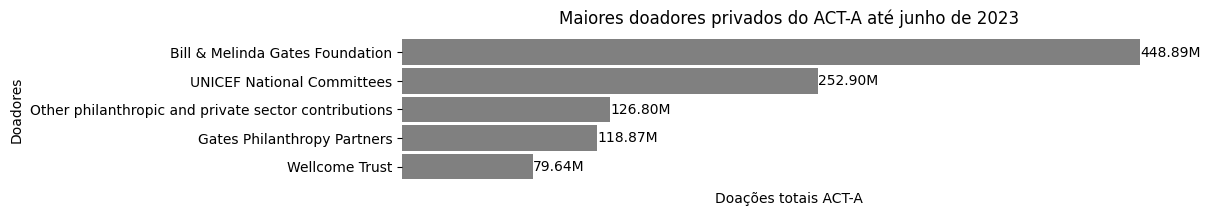

In [8]:
gerar_grafico_tipo_doador(df=df_top, tipo_doador=tipo_doador,grafico_titulo=grafico_titulo,nome_eixo_x=nome_eixo_x,nome_eixo_y=nome_eixo_y)

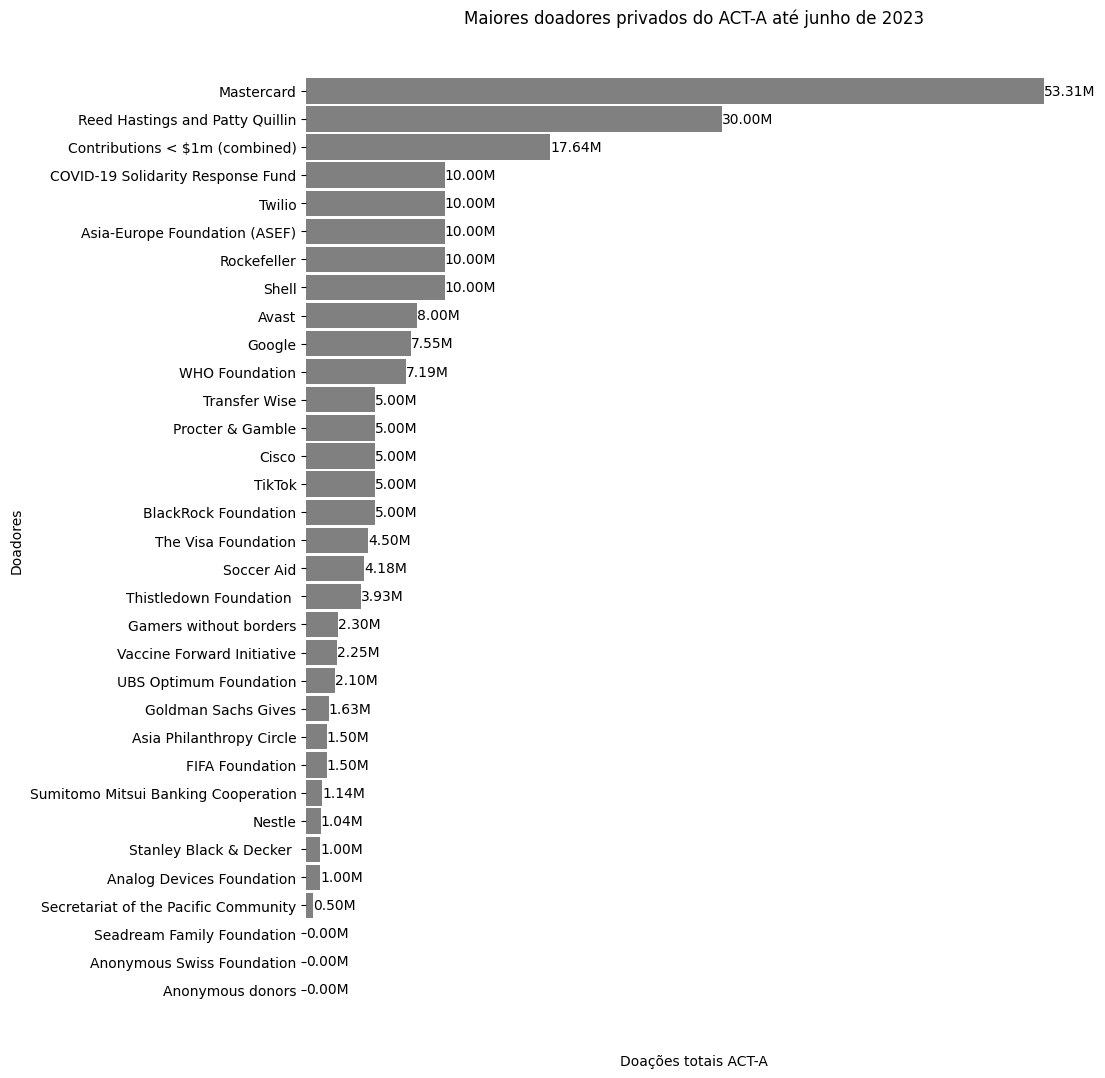

In [9]:
df_restante = df.tail(len(df) - 5)
gerar_grafico_tipo_doador(df=df_restante, tipo_doador=tipo_doador,grafico_titulo=grafico_titulo,nome_eixo_x=nome_eixo_x,nome_eixo_y=nome_eixo_y)

## Selecionados

In [10]:
# A partir de seleção de privados
arquivo = "/content/drive/MyDrive/ghg_act-a/tabelas/origem-privados.xlsx"
nome_aba = "aba_01"
privados = pd.read_excel(arquivo, skiprows=0, sheet_name=nome_aba)

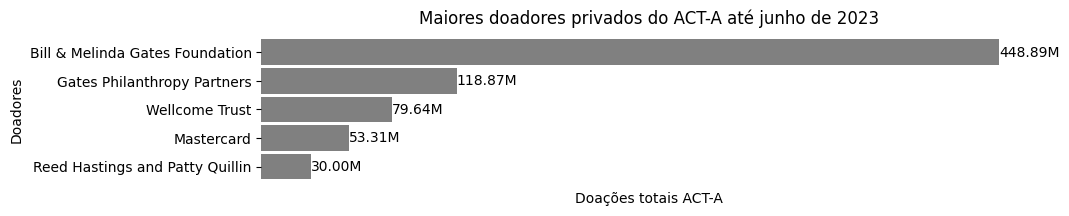

In [11]:
doadores_privados_origem = pd.merge(act_a, privados, on="Donor")
doadores_privados_origem = doadores_privados_origem.sort_values(by="TOTAL ACT-A funding", ascending=False)
df_top_privados = doadores_privados_origem.head(5)

gerar_grafico_tipo_doador(df=df_top_privados, tipo_doador=tipo_doador,grafico_titulo=grafico_titulo,nome_eixo_x=nome_eixo_x,nome_eixo_y=nome_eixo_y)

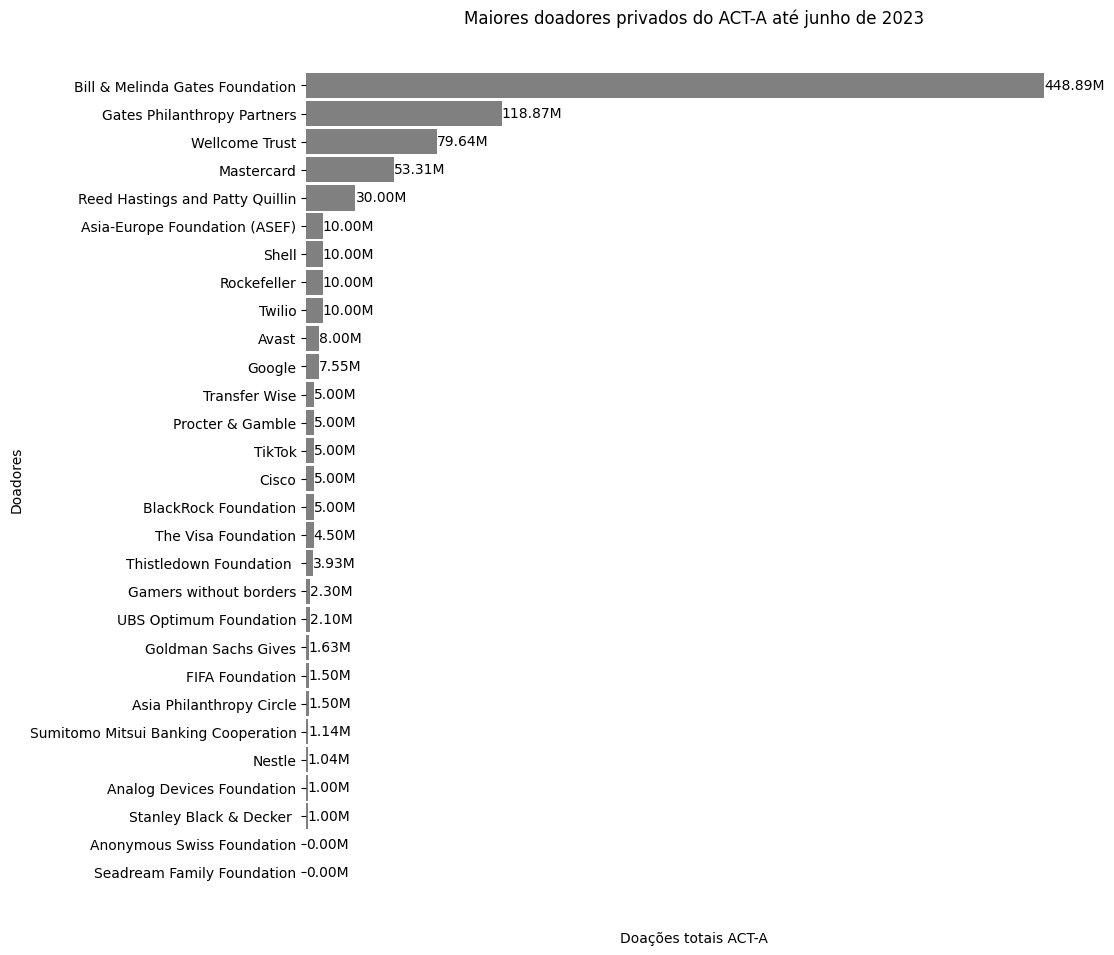

In [12]:
df_privado_restante = doadores_privados_origem.tail(len(df) - 5)
gerar_grafico_tipo_doador(df=df_privado_restante, tipo_doador=tipo_doador,grafico_titulo=grafico_titulo,nome_eixo_x=nome_eixo_x,nome_eixo_y=nome_eixo_y)

In [13]:
df = doadores_privados_origem
df['Latitude'], df['Longitude'] = zip(*df['Origin'].apply(obter_coordenadas_por_pais).tolist())

lalo = df

## Doação privada por origem de pais

In [14]:
df = lalo

soma_por_pais = df.groupby('Origin').agg({'TOTAL ACT-A funding': 'sum', 'Donor': 'count'}).reset_index()
soma_por_pais = soma_por_pais.rename(columns={'TOTAL ACT-A funding': 'Soma TOTAL ACT-A funding', 'Donor': 'Total de Doadores'})
soma_por_pais = soma_por_pais.sort_values(by='Soma TOTAL ACT-A funding', ascending=False)
soma_por_pais

,Origin,Soma TOTAL ACT-A funding,Total de Doadores
7,United States of America,701.739046,15
6,United Kingdom,94.643751,3
4,Singapore,16.500000,3
1,Czech Republic,7.999959,1
5,Switzerland,4.641992,4
0,Canada,3.932054,1
3,Saudi Arabia,2.304500,1
2,Japan,1.141683,1


In [15]:
fig = px.scatter_geo(soma_por_pais, locations='Origin', locationmode='country names',
                     size='Soma TOTAL ACT-A funding', color='Total de Doadores',
                     projection='natural earth', title='Scatter_geo - Soma de TOTAL ACT-A funding e Total de Doadores por País')

# Exibir o gráfico
fig.show()

## Por Ano

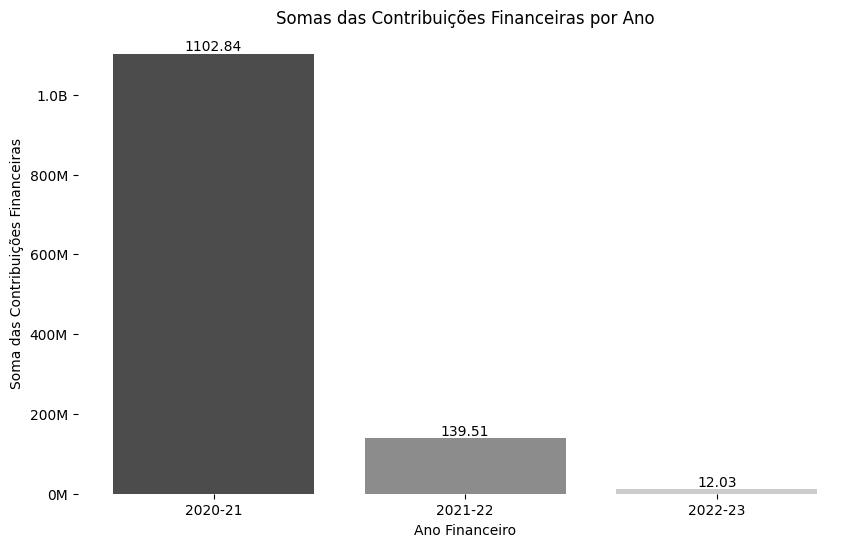

In [16]:
df = df_privado
gerar_grafico_tipo_doador_ano(df)[0]

# Doadores públicos



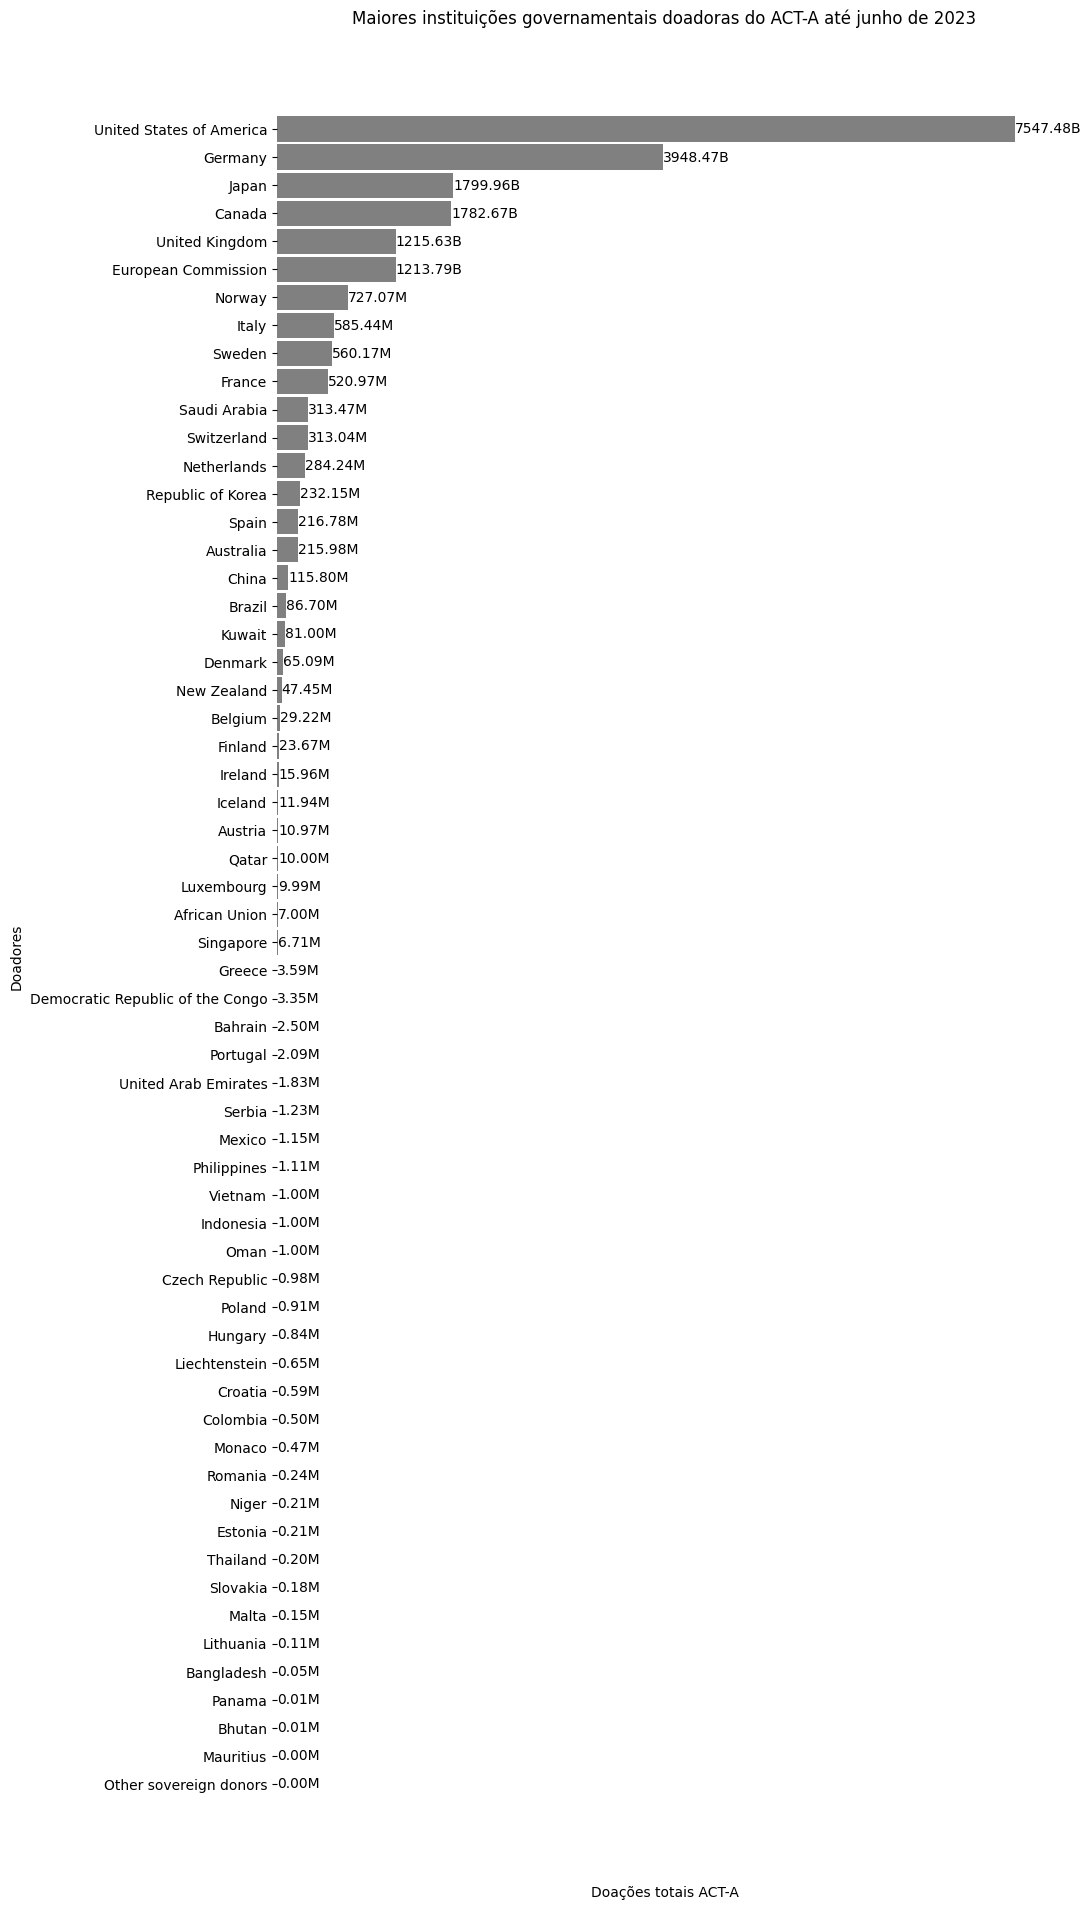

In [17]:

tipo_doador = 'Public'
grafico_titulo = 'Maiores instituições governamentais doadoras do ACT-A até junho de 2023'
nome_eixo_x = 'Doações totais ACT-A'
nome_eixo_y = 'Doadores'

df = act_a
df = df.dropna(subset=['Type'])
# Redefinir o índice
df = df.reset_index(drop=True)
condicao_exclusao = (
    (df['Donor'] == 'Public donors Sub-total')|
    (df['Donor'] == 'Pledges not gap reducing and not contributing to 2021-22 fair share') |
    (df['Donor'].str.contains('pledge', case=False)) | (df['Donor'].str.contains('NGR', case=False)) |
    (df['Donor'].str.contains('Team Europe', case=False))
    )
df = df[(df['Type'].str.contains(tipo_doador, case=False, na=False)) & (~condicao_exclusao)]
df = df.sort_values(by="TOTAL ACT-A funding", ascending=False)
df_top_gov = df.head(7)
# Redefinir o índice começando por 1
df_gov = df
df_gov.index = range(1, len(df) + 1)


gerar_grafico_tipo_doador(df=df_gov, tipo_doador=tipo_doador,grafico_titulo=grafico_titulo,nome_eixo_x=nome_eixo_x,nome_eixo_y=nome_eixo_y)



In [47]:
# df['latitude'], df['longitude'] = zip(*df['Donor'].apply(obter_coordenadas_por_pais).tolist())
# df.sort_values(by='TOTAL ACT-A funding', ascending=False)

## Mapa

In [ ]:
fig = px.colors.qualitative.swatches()
fig.show()

In [49]:
df_gov

,Donor,Type,TOTAL ACT-A funding,2020-21 financial contributions,2021-22 financial contributions,2022-23 financial contributions,CEPI,Gavi,Therapeutics Accelerator,Unitaid,...,Pending Allocation to/by Agency,Vaccines,Therapeutics,Diagnostics,Health Systems,Pending Allocation to/by Pillars,Comments,latitude,longitude,Valor Doado
1,United States of America,Public,7547.480883,6839.255228,692.298710,15.926945,50.000000,4000.000000,0.0000,0.000000,...,0.000000,4352.341489,806.250000,865.500000,1126.576825,396.812569,The US will release an additional US$ 1.5 bill...,39.783730,-100.445882,7600
2,Germany,Public,3948.468521,2599.043644,1333.912985,15.511892,486.578802,1659.678482,0.0000,42.700000,...,0.000000,2761.060051,99.868164,187.634621,303.867027,596.038658,Gavi figures include the pro-rata share of una...,40.420348,-79.116698,entre 1500 e 3500 Bilhões
3,Japan,Public,1799.957981,1227.689684,562.455521,9.812776,96.272727,1500.000000,0.0000,9.310092,...,0.000000,1757.289432,9.496517,0.000000,30.151548,3.020484,Gavi figures include the pro-rata share of una...,36.574844,139.239418,entre 1000 e 1800 Bilhões
4,Canada,Public,1782.671947,1151.742548,548.151377,82.778021,70.076601,669.094070,0.0000,49.800000,...,83.000000,969.089782,231.762025,33.200000,266.420139,282.200000,$40m of funds provided to WHO are specified fo...,61.066692,-107.991707,entre 1000 e 1800 Bilhões
5,United Kingdom,Public,1215.629322,465.204322,750.425000,0.000000,318.487290,735.187773,50.0000,0.000000,...,0.000000,1053.905165,51.796156,31.928000,0.000000,78.000000,"For Gavi, £250m are conditional to a matching ...",54.702354,-3.276575,entre 1000 e 1800 Bilhões
6,European Commission,Public,1213.786750,611.337084,602.449666,0.000000,117.924902,869.512165,0.0000,0.000000,...,0.000000,1048.082743,0.000000,0.000000,0.000000,165.704007,"In addition, on August 31st 2020, the EC annou...",50.843141,4.383206,entre 1000 e 1800 Bilhões
7,Norway,Public,727.073597,387.376752,339.696844,0.000000,292.364685,197.685570,6.7000,53.900000,...,0.000000,496.066697,59.067374,22.000000,59.762191,90.177335,Norway has provided US$34 million to the GFF C...,64.573154,11.528036,entre 700 e 800 Milhões
8,Italy,Public,585.442620,466.999843,118.442777,0.000000,17.672843,551.507000,0.0000,1.220000,...,0.000000,571.883851,1.220000,1.070000,3.630870,7.637899,NaN,42.638426,12.674297,entre 520 e 586 Milhões
9,Sweden,Public,560.170419,264.890000,295.280419,0.000000,0.000000,549.170419,0.0000,0.000000,...,0.000000,549.170419,0.000000,0.000000,0.000000,11.000000,Gavi figures include the pro-rata share of una...,44.133435,-70.822678,entre 520 e 586 Milhões
10,France,Public,520.972703,261.214489,259.758214,0.000000,0.000000,337.791403,0.0000,48.800000,...,0.000000,362.381527,48.842692,0.372031,80.408239,28.968214,Two year €50m contribution to WHO (2020 and 2021),46.603354,1.888334,entre 520 e 586 Milhões


In [137]:
# cores = ['rgb(5, 112, 83)', 'rgb(3, 182, 134)', 'rgb(104, 241, 231)', 'rgb(83, 228, 188)', 'rgb(54, 168, 137)', 'rgb(90, 141, 127)', 'rgb(52, 68, 64)', 'rgb(120, 200, 80)', 'rgb(160, 210, 45)', 'rgb(200, 220, 20)']
cores = px.colors.qualitative.D3
# doador_gov = df['TOTAL ACT-A funding'].sum()
# print(doador_gov)

def doadores_gov(x):
  if x > 7500:
    return '{} Bilhões'.format(7.600)
  elif x > 3500:
    return 'entre {} e {} Bilhões'.format(1.500, 3.500)
  elif 1000 < x < 1800:
      return 'entre {} e {} Bilhões'.format(1.000, 1.800)
  elif  700 < x < 728:
    return 'entre {} e {} Milhões'.format(700, 800)
  elif 520 < x <= 586:
      return 'entre {} e {} Milhões'.format(520,586)
  elif 200 < x <= 314:
      return 'entre {} e {} Milhões'.format(200,314)
  elif 50 < x <= 116:
      return 'entre {} e {} Milhões'.format(50,116)
  elif 10 < x <= 50:
      return 'entre {} e {} Milhões'.format(10,50)
  elif 1 < x <= 10:
      return 'entre {} e {} Milhões'.format(1, 10)
  elif x <= 1:
      return 'entre {} e {} Milhão'.format(0, 1)

# Aplicando a função para criar uma nova coluna em df_gov
df_gov['Valor Doado'] = df_gov['TOTAL ACT-A funding'].apply(doadores_gov)

# Criando o mapa de coropléticos
fig = px.choropleth(df_gov,
                    title='Doação de Instituições Governamentais',
                    locations='Donor',
                    locationmode='country names',
                    projection='natural earth',
                    height=900,
                    width=1800,
                    color='Valor Doado',
                    color_discrete_map=dict(zip(df_gov['Valor Doado'].unique(), cores)))

# Personalizando o layout para aproximar a legenda do mapa, centralizar o título e aumentar o tamanho da fonte da legenda
fig.update_layout(legend=dict(x=1,
                              y=0.6,
                              font=dict(size=20)),  # Ajuste o tamanho da fonte conforme necessário
                  margin=dict(l=0, r=0, b=0, t=0),  # Ajuste os valores conforme necessário
                  title_x=0.5)  # Centraliza o título

# Mostrando o gráfico
fig.show()

In [140]:
# cores = ['rgb(5, 112, 83)', 'rgb(3, 182, 134)', 'rgb(104, 241, 231)', 'rgb(83, 228, 188)', 'rgb(54, 168, 137)', 'rgb(90, 141, 127)', 'rgb(52, 68, 64)', 'rgb(120, 200, 80)', 'rgb(160, 210, 45)', 'rgb(200, 220, 20)']
cores = px.colors.qualitative.D3
# doador_gov = df['TOTAL ACT-A funding'].sum()
# print(doador_gov)

def doadores_gov(x):
  if x > 7500:
    return '{} Bilhões'.format(7.600)
  elif x > 3500:
    return 'entre {} e {} Bilhões'.format(1.500, 3.500)
  elif 1000 < x < 1800:
      return 'entre {} e {} Bilhões'.format(1.000, 1.800)
  elif  700 < x < 728:
    return 'entre {} e {} Milhões'.format(700, 800)
  elif 520 < x <= 586:
      return 'entre {} e {} Milhões'.format(520,586)
  elif 200 < x <= 314:
      return 'entre {} e {} Milhões'.format(200,314)
  elif 50 < x <= 116:
      return 'entre {} e {} Milhões'.format(50,116)
  elif 10 < x <= 50:
      return 'entre {} e {} Milhões'.format(10,50)
  elif 1 < x <= 10:
      return 'entre {} e {} Milhões'.format(1, 10)
  elif x <= 1:
      return 'entre {} e {} Milhão'.format(0, 1)

# Aplicando a função para criar uma nova coluna em df_gov
df_gov['Valor Doado'] = df_gov['TOTAL ACT-A funding'].apply(doadores_gov)

# Criando o mapa de coropléticos
fig = px.choropleth(df_gov,
                    title='Doação de Instituições Governamentais',
                    locations='Donor',
                    locationmode='country names',
                    projection='natural earth',
                    height=900,
                    width=1800,
                    color='Valor Doado',
                    color_discrete_map=dict(zip(df_gov['Valor Doado'].unique(), cores)))

# Personalizando o layout para aproximar a legenda do mapa, centralizar o título e aumentar o tamanho da fonte da legenda
fig.update_layout(legend=dict(x=-0.5,
                              y=0.6,
                              font=dict(size=16)),  # Ajuste o tamanho da fonte conforme necessário
                  margin=dict(l=0, r=0, b=0, t=0),  # Ajuste os valores conforme necessário
                  title_x=0.5)  # Centraliza o título

# Mostrando o gráfico
fig.show()

## Por Ano

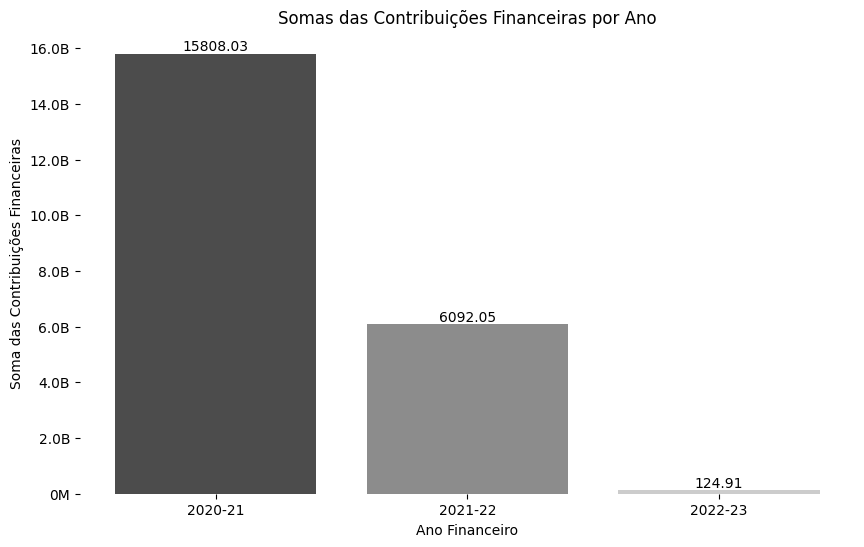

In [21]:
df = df_gov
gerar_grafico_tipo_doador_ano(df)[0]



# Doadores Multilaterais



In [22]:
tipo_doador = 'Multilateral'
grafico_titulo = 'Maiores instituições multilaterais doadoras do ACT-A até junho de 2023'
nome_eixo_x = 'Doações totais ACT-A'
nome_eixo_y = 'Doadores'

df = act_a
df = df.dropna(subset=['Type'])
# Redefinir o índice
df = df.reset_index(drop=True)
condicao_exclusao = (
    (df['Donor'] == 'Multilateral donors Sub-total')
    )
df = df[(df['Type'].str.contains(tipo_doador, case=False, na=False)) & (~condicao_exclusao)]
df = df.sort_values(by="TOTAL ACT-A funding", ascending=False)
# Redefinir o índice começando por 1
df_multilateral = df
df_multilateral.index = range(1, len(df) + 1)
df_multilateral

,Donor,Type,TOTAL ACT-A funding,2020-21 financial contributions,2021-22 financial contributions,2022-23 financial contributions,CEPI,Gavi,Therapeutics Accelerator,Unitaid,...,Unicef,GFF,MPP,Pending Allocation to/by Agency,Vaccines,Therapeutics,Diagnostics,Health Systems,Pending Allocation to/by Pillars,Comments
1,The Global Fund (COVID-19 Response Mechanism),Multilateral,458.204683,458.204683,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,182.228422,275.976261,0.000000,Recent contributions to Global Fund are contin...
2,WHO flexible funding,Multilateral,352.729764,352.729764,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.079692,7.21716,4.086691,112.838379,220.507842,The allocation of flexible contributions to WH...
3,Unitaid (core resources),Multilateral,35.000000,35.000000,0.000000,0.000000,0.0,0.0,0.0,35.0,...,0.0,0.0,0.0,0.0,0.000000,20.00000,15.000000,0.000000,0.000000,NaN
4,World Bank,Multilateral,12.007881,0.000000,0.000000,12.007881,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,9.000000,3.007881,NaN
5,GAVI,Multilateral,10.722429,0.000000,10.722429,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,10.722429,NaN
6,UNDP,Multilateral,7.524306,7.524306,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.524306,0.00000,0.000000,0.000000,0.000000,NaN
7,Asian Development Bank,Multilateral,2.720400,0.000000,2.720400,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.520000,0.00000,0.000000,0.000000,2.200400,NaN
8,United Nations Development Programme (UNDP) Mu...,Multilateral,0.728844,0.000000,0.728844,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.728844,NaN
9,World Food Programme,Multilateral,0.299044,0.000000,0.299044,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.299044,NaN
10,United Nations Foundation,Multilateral,0.135700,0.000000,0.135700,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.135700,0.000000,0.000000,NaN


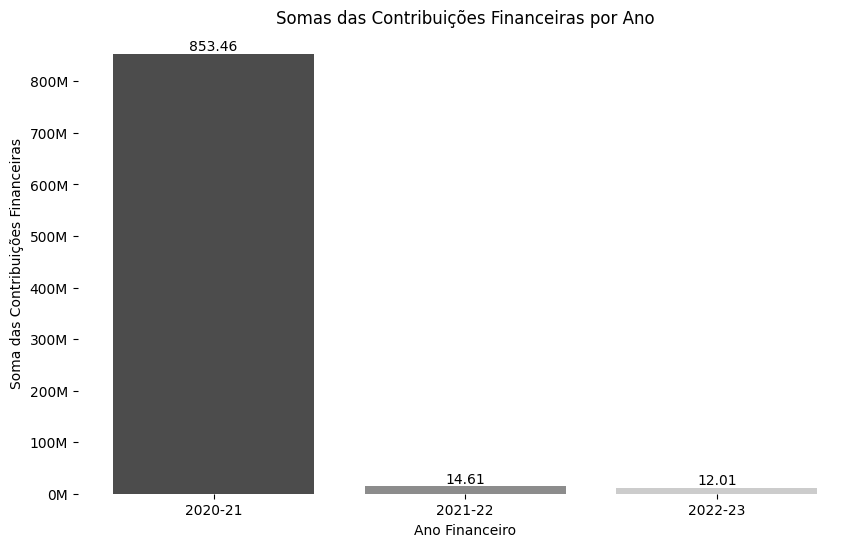

In [23]:
df = df_multilateral
gerar_grafico_tipo_doador_ano(df)[0]

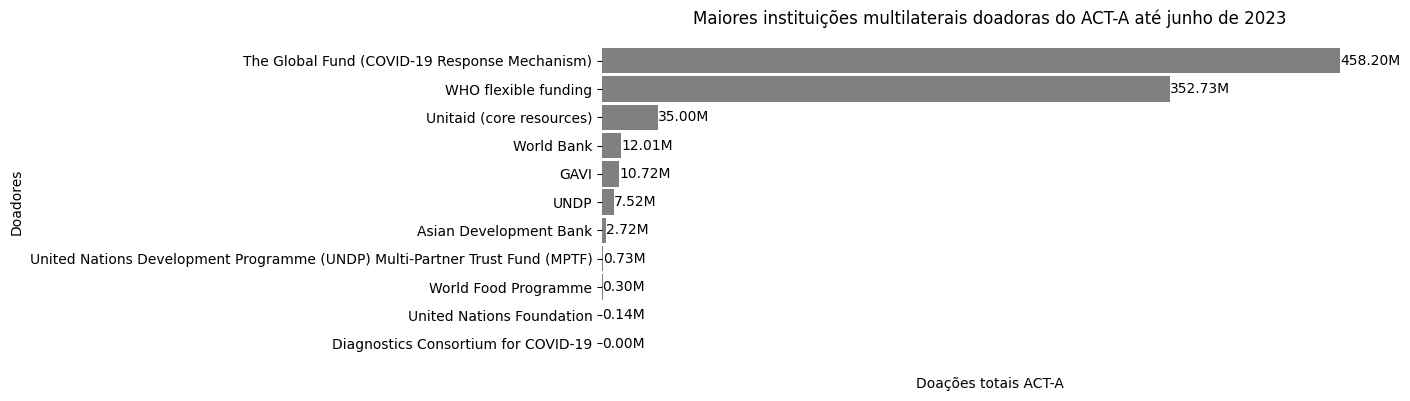

In [24]:
gerar_grafico_tipo_doador(df=df_multilateral, tipo_doador=tipo_doador,grafico_titulo=grafico_titulo,nome_eixo_x=nome_eixo_x,nome_eixo_y=nome_eixo_y)

# Doadores Geral

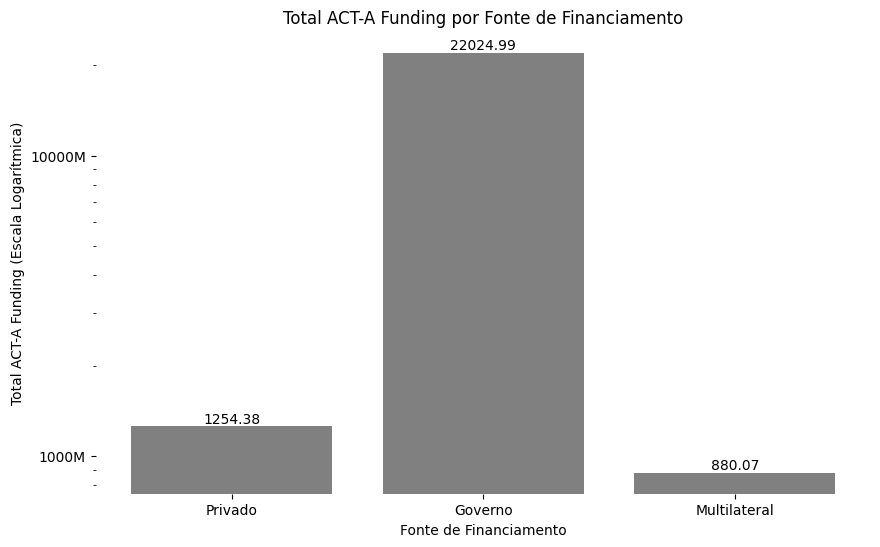

In [25]:
# Soma dos valores
total_privado = df_privado['TOTAL ACT-A funding'].sum()
total_gov = df_gov['TOTAL ACT-A funding'].sum()
total_multilateral = df_multilateral['TOTAL ACT-A funding'].sum()

# Configuração do gráfico
plt.figure(figsize=(10, 6))
plt.box(False)  # Remover bordas da caixa ao redor do gráfico

# Gráfico de barras em escala logarítmica
labels = ['Privado', 'Governo', 'Multilateral']
totals = [total_privado, total_gov, total_multilateral]

bars = plt.bar(labels, totals, color=['gray', 'gray', 'gray'])

plt.xlabel('Fonte de Financiamento')
plt.ylabel('Total ACT-A Funding (Escala Logarítmica)')
plt.title('Total ACT-A Funding por Fonte de Financiamento')

# Adiciona rótulos com os valores reais acima das barras
for bar, total in zip(bars, totals):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{total:.2f}',
             ha='center', va='bottom')

# Configuração do eixo y para escala logarítmica
plt.yscale('log')

# Configuração do eixo y para mostrar incrementos de 200 milhões
formatter = FuncFormatter(lambda x, _: f'{x:.0f}M' if x > 0 else '0')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

# Categorias

In [26]:
arquivo = "/content/drive/MyDrive/ghg_act-a/tabelas/arquivos2.xlsx"
nome_aba = "arquivos"
categorias = pd.read_excel(arquivo, sheet_name=nome_aba)
categorias


,data,categoria,titulo,nome_arquivo
0,2020-04-24 00:00:00,Founding,Access to COVID-19 Tools (ACT) Accelerator A G...,2020_04_24_Founding_Access to COVID-19 Tools (...
1,2020-06-26 00:00:00,Budget,ACT Accelerator Investment Case Invest now to ...,2020_06_26_Budget_ACT Accelerator Investment C...
2,2020-08-06 00:00:00,Showcase,"COVAX, the ACT-Accelerator vaccines pillar Ins...","2020_08_06_Showcase_COVAX, the ACT-Accelerator..."
3,2020-09-24 00:00:00,Budget,financing requirements September 2020 – Decemb...,2020_09_24_Budget_ACT-Accelerator_ An economic...
4,2020-09-24 00:00:00,Strategic Plan,Status report and plan September 2020 – Decemb...,2020_09_24_Strategic Plan_ACT-Accelerator_ Sta...
...,...,...,...,...
97,00/00/2021,Evaluation,combined report,2021_Evaluation_CEPI mid-term review and COVID...
98,00/00/2022,Evaluation,TOR Independent Evaluation Reference Group ACT...,2022_Evaluation_TOR Independent Evaluation Ref...
99,00/01/2022,Budget,The Gavi COVAX AMC Investment Opportunity,2022_01_Budget_Break COVID Now_ The Gavi COVAX...
100,00/04/2022,Evaluation,s COVID-19 Vaccine Development Agreements,2022_04_Evaluation_Equitable Access Review of ...


In [27]:

df = categorias
# Força o tratamento da coluna 'data' como string
df['data'] = df['data'].astype(str)

# Substitui datas inválidas (mês '00') por NaT
df['data'] = pd.to_datetime(df['data'], errors='coerce')

# Aplica a formatação apenas se a data não for NaT
df['data_formatada'] = df['data'].apply(lambda x: x.strftime('%m/%Y') if not pd.isnull(x) else '')
df


,data,categoria,titulo,nome_arquivo,data_formatada
0,2020-04-24,Founding,Access to COVID-19 Tools (ACT) Accelerator A G...,2020_04_24_Founding_Access to COVID-19 Tools (...,04/2020
1,2020-06-26,Budget,ACT Accelerator Investment Case Invest now to ...,2020_06_26_Budget_ACT Accelerator Investment C...,06/2020
2,2020-08-06,Showcase,"COVAX, the ACT-Accelerator vaccines pillar Ins...","2020_08_06_Showcase_COVAX, the ACT-Accelerator...",08/2020
3,2020-09-24,Budget,financing requirements September 2020 – Decemb...,2020_09_24_Budget_ACT-Accelerator_ An economic...,09/2020
4,2020-09-24,Strategic Plan,Status report and plan September 2020 – Decemb...,2020_09_24_Strategic Plan_ACT-Accelerator_ Sta...,09/2020
...,...,...,...,...,...
97,NaT,Evaluation,combined report,2021_Evaluation_CEPI mid-term review and COVID...,
98,NaT,Evaluation,TOR Independent Evaluation Reference Group ACT...,2022_Evaluation_TOR Independent Evaluation Ref...,
99,NaT,Budget,The Gavi COVAX AMC Investment Opportunity,2022_01_Budget_Break COVID Now_ The Gavi COVAX...,
100,NaT,Evaluation,s COVID-19 Vaccine Development Agreements,2022_04_Evaluation_Equitable Access Review of ...,


In [28]:
# Convertendo a coluna 'data_formatada' para o tipo datetime com tratamento de erros
df['data_formatada'] = pd.to_datetime(df['data_formatada'], format='%m/%Y', errors='coerce')

# Removendo as linhas com valores de data inválidos
df = df.dropna(subset=['data_formatada'])

# Filtrando as datas no intervalo desejado (04/2020 a 09/2021)
filtro_datas = (df['data_formatada'] >= '2020-04-01') & (df['data_formatada'] <= '2021-10-27')
df_filtrado = df[filtro_datas]

# Contando a quantidade de cada categoria no intervalo de datas
contagem_categorias = df_filtrado['categoria'].value_counts()
contagem_categorias

Bureaucratic      19
Report            14
Showcase          10
Budget             9
Strategic Plan     2
Founding           1
Evaluation         1
Name: categoria, dtype: int64

In [29]:
# Convertendo a coluna 'data_formatada' para o tipo datetime com tratamento de erros
df['data_formatada'] = pd.to_datetime(df['data_formatada'], format='%m/%Y', errors='coerce')

# Removendo as linhas com valores de data inválidos
df = df.dropna(subset=['data_formatada'])

# Filtrando as datas no "momento 1" (04/2020 a 09/2021)
filtro_datas_momento1 = (df['data_formatada'] >= '2020-04-01') & (df['data_formatada'] <= '2021-10-27')
df_momento1 = df[filtro_datas_momento1]

# Contando a quantidade de cada categoria no "momento 1"
contagem_categorias_momento1 = df_momento1['categoria'].value_counts()

# Criando um novo DataFrame com as contagens
df_resultado = pd.DataFrame({'categorias': contagem_categorias_momento1.index, 'momento 1': contagem_categorias_momento1.values})
df_resultado

<ipython-input-29-3d0a52fa7b50>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,categorias,momento 1
0,Bureaucratic,19
1,Report,14
2,Showcase,10
3,Budget,9
4,Strategic Plan,2
5,Founding,1
6,Evaluation,1


In [30]:
# Convertendo a coluna 'data_formatada' para o tipo datetime com tratamento de erros
df['data_formatada'] = pd.to_datetime(df['data_formatada'], format='%m/%Y', errors='coerce')

# Removendo as linhas com valores de data inválidos
df = df.dropna(subset=['data_formatada'])

# Definindo os momentos
momentos = {'momento 1': ('2020-04-01', '2021-10-27'),
            'momento 2': ('2021-10-28', '2022-10-27'),
            'momento 3': ('2022-10-28', '2023-10-31')}

# Criando um DataFrame para armazenar as contagens
df_resultado = pd.DataFrame()

# Iterando sobre os momentos
for momento, (inicio, fim) in momentos.items():
    filtro_datas_momento = (df['data_formatada'] >= inicio) & (df['data_formatada'] <= fim)
    df_momento = df[filtro_datas_momento]

    contagem_categorias_momento = df_momento['categoria'].value_counts().reset_index()

    # Preenchendo o DataFrame de resultados
    df_resultado = pd.concat([df_resultado, contagem_categorias_momento.set_index('index').rename(columns={'categoria': momento})], axis=1)

# Resetando o índice e movendo 'categorias' para uma coluna
df_resultado = df_resultado.reset_index().rename(columns={'index': 'categorias'})

# Preenchendo os NaN com zeros
df_resultado = df_resultado.fillna(0)

df_resultado

,categorias,momento 1,momento 2,momento 3
0,Bureaucratic,19,7.0,2.0
1,Report,14,6.0,4.0
2,Showcase,10,6.0,1.0
3,Budget,9,4.0,0.0
4,Strategic Plan,2,3.0,1.0
5,Founding,1,0.0,0.0
6,Evaluation,1,3.0,3.0


In [31]:
# # Plotando um gráfico de barras para cada momento
# for momento in momentos.keys():
#     plt.figure(figsize=(10, 6))
#     plt.bar(df_resultado['categorias'], df_resultado[momento])
#     plt.title(f'Distribuição de Categorias - {momento}')
#     plt.xlabel('Categorias')
#     plt.ylabel('Contagem')
#     plt.xticks(rotation=45, ha='right')
#     plt.show()




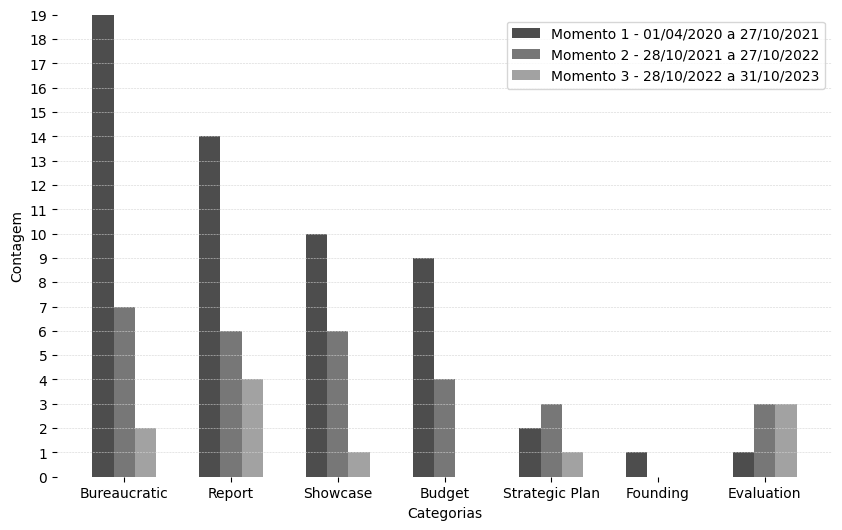

In [32]:
momentos = ['momento 1', 'momento 2', 'momento 3']

bar_width = 0.2
index = np.arange(len(df_resultado['categorias']))

plt.figure(figsize=(10, 6))

for i, momento in enumerate(momentos):
    gray_level = 0.3 + (i / len(momentos)) * 0.5  # Ajuste para tons de cinza mais escuros
    plt.bar(index + i * bar_width, df_resultado[momento], bar_width, label=momento, color=(gray_level, gray_level, gray_level))

plt.title('')
plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.xticks(index + bar_width, df_resultado['categorias'])

# Configurando o eixo y para variar de 0 a 19
plt.yticks(np.arange(20))
plt.ylim(0, 19)

# Customizando a legenda dentro do quadro do gráfico
legend_labels = [
    'Momento 1 - 01/04/2020 a 27/10/2021',
    'Momento 2 - 28/10/2021 a 27/10/2022',
    'Momento 3 - 28/10/2022 a 31/10/2023'
]
plt.legend(legend_labels, loc='upper right')

# Adicionando linhas pontilhadas horizontais em cinza claro
for y in range(1, 19):
    plt.axhline(y, linestyle='dashed', color='lightgray', linewidth=0.4)

# Remover bordas da caixa ao redor do gráfico
plt.box(False)

plt.show()

# Pilares

## Por soma de doações individuais

In [33]:
arquivo = "/content/drive/MyDrive/ghg_act-a/tabelas/2023Jun01-ACT-A_Commitment_Tracker.xlsx"
nome_aba = "2020-21 Budget"
pilar_2020_21 = pd.read_excel(arquivo, skiprows=2, sheet_name=nome_aba)





In [34]:
df = pilar_2020_21

# Excluindo linhas que contêm termos específicos na coluna 'Donor'
exclude_terms = ['Total','Public donors Sub-total', 'Pledges not gap reducing and not contributing to 2021-22 fair share', 'Private donors Sub-total', 'Fidelity Charitable gift funds','Multilateral donors Sub-total', 'WHO flexible funding']
df = df[~df['Donor'].isin(exclude_terms)]

# Substituindo valores vazios por 0
df = df.fillna(0)

# Somando as colunas individualmente
sum_vaccines = df['Vaccines'].sum()
sum_therapeutics = df['Therapeutics'].sum()
sum_diagnostics = df['Diagnostics'].sum()
sum_health_systems = df['Health Systems'].sum()
sum_health_systems



1923.8436130292305

In [35]:
nome_aba = "2021-22 Budget"
pilar_2021_22 = pd.read_excel(arquivo, skiprows=2, sheet_name=nome_aba)
pilar_2021_22

df = pilar_2021_22

# Excluindo linhas que contêm termos específicos na coluna 'Donor'
exclude_terms = ['Total','Public donors Sub-total', 'Pledges not gap reducing and not contributing to 2021-22 fair share', 'Private donors Sub-total', 'Fidelity Charitable gift funds','Multilateral donors Sub-total', 'WHO flexible funding']
df = df[~df['Donor'].isin(exclude_terms)]

# Substituindo valores vazios por 0
df = df.fillna(0)

# Somando as colunas individualmente
sum_vaccines = df['Vaccines'].sum()
sum_therapeutics = df['Therapeutics'].sum()
sum_diagnostics = df['Diagnostics'].sum()
sum_health_systems = df['Health Systems'].sum()
sum_health_systems

717.8535449999999

In [36]:
arquivo = "/content/drive/MyDrive/ghg_act-a/tabelas/2023Jun01-ACT-A_Commitment_Tracker.xlsx"
nome_aba = "2022-23 Transition"
pilar_2022_23 = pd.read_excel(arquivo, skiprows=2, sheet_name=nome_aba)

df = pilar_2022_23

# Excluindo linhas que contêm termos específicos na coluna 'Donor'
exclude_terms = ['Total','Public donors Sub-total', 'Pledges not gap reducing and not contributing to 2021-22 fair share', 'Private donors Sub-total', 'Fidelity Charitable gift funds','Multilateral donors Sub-total', 'WHO flexible funding']
df = df[~df['Donor'].isin(exclude_terms)]

# Substituindo valores vazios por 0
df = df.fillna(0)

# Somando as colunas individualmente
sum_vaccines = df['Vaccines'].sum()
sum_therapeutics = df['Therapeutics'].sum()
sum_diagnostics = df['Diagnostics'].sum()
sum_health_systems = df['Health Systems'].sum()
sum_health_systems
df

,Donor,Type,TOTAL ACT-A funding,CEPI,Gavi,Therapeutics Accelerator,Unitaid,FIND,Global Fund,WHO,Unicef,GFF,MPP,Pending Allocation to/by Agency,Vaccines,Therapeutics,Diagnostics,Health Systems,Pending Allocation to/by Pillars,Comments
2,United States of America,Public,15.926945,0.0,0.0,0.0,0.0,0.0,0.0,15.926945,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.597325,15.329620,0
3,Team Europe,Public,15.715800,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,15.715800,0.0,0.0,0.0,0.0,0.203908,0.0,15.511892,0.000000,0
4,Germany,Public,15.511892,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,15.511892,0.0,0.0,0.0,0.0,0.000000,0.0,15.511892,0.000000,0
5,European Commission,Public,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
6,Sweden,Public,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,United Nations Development Programme (UNDP) Mu...,Multilateral,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
120,World Food Programme,Multilateral,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
122,Asian Development Bank,Multilateral,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
123,World Bank,Multilateral,12.007881,0.0,0.0,0.0,0.0,0.0,0.0,12.007881,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,9.000000,3.007881,0


## Por valor total indicado

In [37]:
arquivo_pilar_ano_pedido = "/content/drive/MyDrive/ghg_act-a/tabelas/pilar_ano_pedido.xlsx"
arquivo = "/content/drive/MyDrive/ghg_act-a/tabelas/2023Jun01-ACT-A_Commitment_Tracker.xlsx"

nome_aba = "2020-21 Budget"
pilar_2020_21_recebido = pd.read_excel(arquivo, skiprows=2, sheet_name=nome_aba)

nome_aba = "2021-22 Budget"
pilar_2021_22_recebido = pd.read_excel(arquivo, skiprows=2, sheet_name=nome_aba)

nome_aba = "2022-23 Transition"
pilar_2022_23_recebido = pd.read_excel(arquivo, skiprows=2, sheet_name=nome_aba)

nome_aba = "pilares"
pilares_pedido = pd.read_excel(arquivo_pilar_ano_pedido, sheet_name=nome_aba)


pilar_2020_21_recebido = pilar_2020_21_recebido[pilar_2020_21_recebido['Donor'] == 'Total']
pilar_2020_21_recebido = pilar_2020_21_recebido[["Vaccines",	"Therapeutics",	"Diagnostics",	"Health Systems"]]

pilar_2021_22_recebido = pilar_2021_22_recebido[pilar_2021_22_recebido['Donor'] == 'Total']
pilar_2021_22_recebido = pilar_2021_22_recebido[["Vaccines",	"Therapeutics",	"Diagnostics",	"Health Systems"]]

pilar_2022_23_recebido = pilar_2022_23_recebido[pilar_2022_23_recebido['Donor'] == 'Total']
pilar_2022_23_recebido = pilar_2022_23_recebido[["Vaccines",	"Therapeutics",	"Diagnostics",	"Health Systems"]]



pilar_2020_21_recebido
pilar_2021_22_recebido
pilar_2022_23_recebido


# Adicione a coluna "Period" para cada dataframe
pilar_2020_21_recebido['Period'] = '2020_2021'
pilar_2021_22_recebido['Period'] = '2021_2022'
pilar_2022_23_recebido['Period'] = '2022_2023'


pilar_anos_recebido = pd.concat([pilar_2020_21_recebido, pilar_2021_22_recebido, pilar_2022_23_recebido], ignore_index=True)

# Se desejar, você pode reordenar as colunas
pilar_anos_recebido = pilar_anos_recebido[["Period","Vaccines",	"Therapeutics",	"Diagnostics",	"Health Systems"]]
pilar_anos_recebido

pilares_pedido

,Period,Vaccines,Diagnostics,Therapeutics,Health Systems,Comments
0,2020_2021,"16000,0","6000,0","7000,0","9000,0","(ACT-A, 2020e, p. 17)"
1,2021_2022,"7000,0","7000,0","3500,0","5900,0","(ACT-A, 2021c, p. 35)"
2,2022_2023,0,"78,0","63,0","245,0","(ACT-A, 2022b, p. 37)"


In [38]:
pedidos_df = pilares_pedido
recebidos_df = pilar_anos_recebido


# Mesclar os DataFrames com base na coluna 'Period'
merged_df = pd.merge(pedidos_df, recebidos_df, on='Period', suffixes=('_pedido', '_recebido'))

# # Reorganizar os dados usando o método pivot
# merged_df = merged_df.melt(id_vars=['Period'], var_name='Categoria', value_name='Valor')
merged_df



,Period,Vaccines_pedido,Diagnostics_pedido,Therapeutics_pedido,Health Systems_pedido,Comments,Vaccines_recebido,Therapeutics_recebido,Diagnostics_recebido,Health Systems_recebido
0,2020_2021,"16000,0","6000,0","7000,0","9000,0","(ACT-A, 2020e, p. 17)",11901.518441,1570.732717,1369.719630,1872.474037
1,2021_2022,"7000,0","7000,0","3500,0","5900,0","(ACT-A, 2021c, p. 35)",4451.114209,153.973891,72.596707,458.192675
2,2022_2023,0,"78,0","63,0","245,0","(ACT-A, 2022b, p. 37)",0.000000,21.625949,0.000000,97.349591


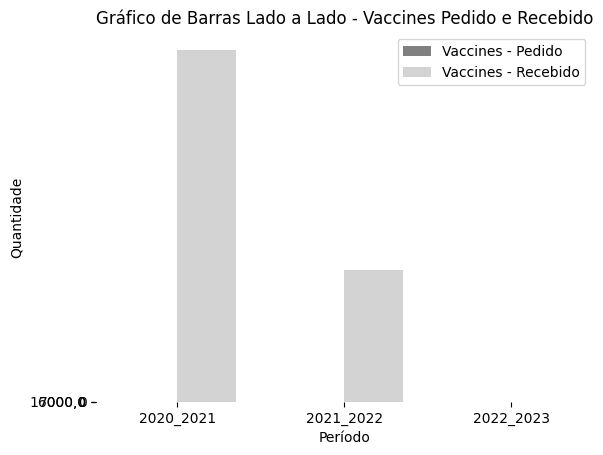

In [39]:
# Configurar parâmetros para o gráfico de barras lado a lado
bar_width = 0.35
index = np.arange(len(merged_df['Period']))

# Plotar o gráfico de barras lado a lado
fig, ax = plt.subplots()

ax.bar(index, merged_df['Vaccines_pedido'], bar_width, label='Vaccines - Pedido', color='gray')
ax.bar(index + bar_width, merged_df['Vaccines_recebido'], bar_width, label='Vaccines - Recebido', color='lightgray')

# Adicionar rótulos e título
ax.set_xlabel('Período')
ax.set_ylabel('Quantidade')
ax.set_title('Gráfico de Barras Lado a Lado - Vaccines Pedido e Recebido')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(merged_df['Period'])
ax.legend()

 # Remover bordas da caixa ao redor do gráfico
plt.box(False)

# Exibir o gráfico
plt.show()

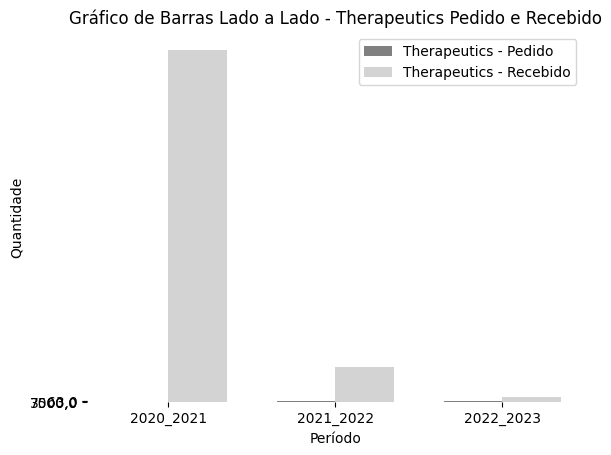

In [40]:
# Configurar parâmetros para o gráfico de barras lado a lado
bar_width = 0.35
index = np.arange(len(merged_df['Period']))

# Plotar o gráfico de barras lado a lado
fig, ax = plt.subplots()

ax.bar(index, merged_df['Therapeutics_pedido'], bar_width, label='Therapeutics - Pedido', color='gray')
ax.bar(index + bar_width, merged_df['Therapeutics_recebido'], bar_width, label='Therapeutics - Recebido', color='lightgray')

# Adicionar rótulos e título
ax.set_xlabel('Período')
ax.set_ylabel('Quantidade')
ax.set_title('Gráfico de Barras Lado a Lado - Therapeutics Pedido e Recebido')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(merged_df['Period'])
ax.legend()

 # Remover bordas da caixa ao redor do gráfico
plt.box(False)

# Exibir o gráfico
plt.show()

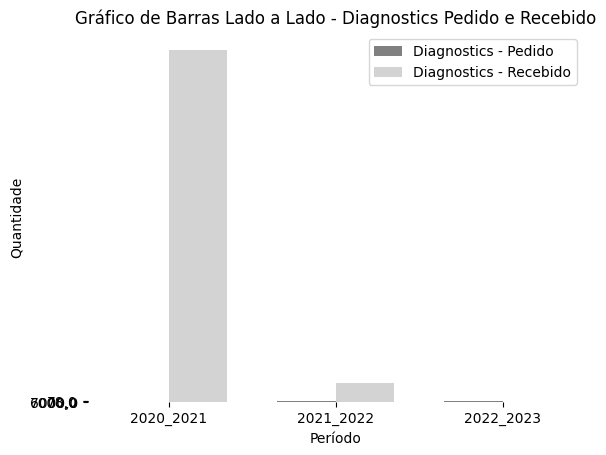

In [41]:
# Configurar parâmetros para o gráfico de barras lado a lado
bar_width = 0.35
index = np.arange(len(merged_df['Period']))

# Plotar o gráfico de barras lado a lado
fig, ax = plt.subplots()

ax.bar(index, merged_df['Diagnostics_pedido'], bar_width, label='Diagnostics - Pedido', color='gray')
ax.bar(index + bar_width, merged_df['Diagnostics_recebido'], bar_width, label='Diagnostics - Recebido', color='lightgray')

# Adicionar rótulos e título
ax.set_xlabel('Período')
ax.set_ylabel('Quantidade')
ax.set_title('Gráfico de Barras Lado a Lado - Diagnostics Pedido e Recebido')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(merged_df['Period'])
ax.legend()

 # Remover bordas da caixa ao redor do gráfico
plt.box(False)

# Exibir o gráfico
plt.show()

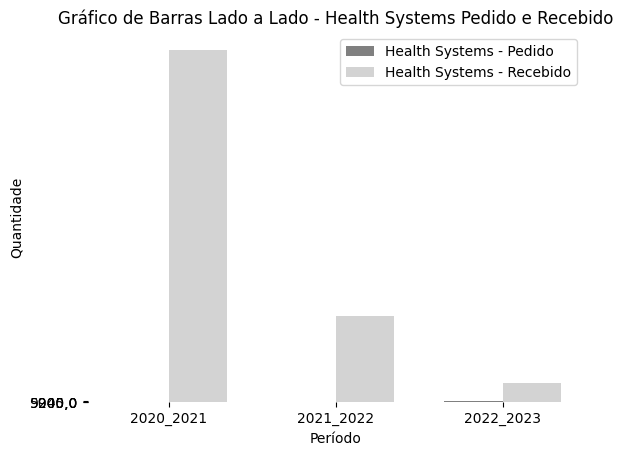

In [42]:
# Configurar parâmetros para o gráfico de barras lado a lado
bar_width = 0.35
index = np.arange(len(merged_df['Period']))

# Plotar o gráfico de barras lado a lado
fig, ax = plt.subplots()

ax.bar(index, merged_df['Health Systems_pedido'], bar_width, label='Health Systems - Pedido', color='gray')
ax.bar(index + bar_width, merged_df['Health Systems_recebido'], bar_width, label='Health Systems - Recebido', color='lightgray')

# Adicionar rótulos e título
ax.set_xlabel('Período')
ax.set_ylabel('Quantidade')
ax.set_title('Gráfico de Barras Lado a Lado - Health Systems Pedido e Recebido')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(merged_df['Period'])
ax.legend()

 # Remover bordas da caixa ao redor do gráfico
plt.box(False)

# Exibir o gráfico
plt.show()

# Agências